In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Combining all the CSV's together

In [3]:
files = []
for f in os.listdir("/Users/RyanHaver/Projects/cryptoStrategies/data/"):
    files.append(f)
files_sorted = sorted(files)

In [4]:
for f in files_sorted:
    csv = open("/Users/RyanHaver/Projects/cryptoStrategies/data/"+f, mode='r')
    try:
        tmp = pd.read_csv(csv, encoding="utf-8")
        tmp.columns=["open_time","open","high","low","close","volume","close_time","quote_volume","count","taker_buy_base_volume","taker_buy_quote_volume"]
        tmp.to_csv("full_data.csv", mode='a', header=False)
    except UnicodeDecodeError:
        print(f)
        break

## Model
Try to model the closing prices as a discrete time markov chain, I'm not sure how useful this actually is

In [2]:
full_df = pd.read_csv(open("/Users/RyanHaver/Projects/cryptoStrategies/full_data.csv"))
full_df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_base_volume,...,10170.0,10170.0.1,10170.0.2,10170.0.3,0.002,1568715599999,20.34,1,0.0,0.0.1
0,1,1568715600000,10170.0,10170.0,10170.0,10170.0,0.0,1568715899999,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1568715900000,10170.0,10170.0,10170.0,10170.0,0.0,1568716199999,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1568716200000,10170.0,10170.0,10170.0,10170.0,0.0,1568716499999,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1568716500000,10170.0,10170.0,10170.0,10170.0,0.0,1568716799999,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1568716800000,10170.0,10170.0,10170.0,10170.0,0.0,1568717099999,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
closePrices = full_df['close']

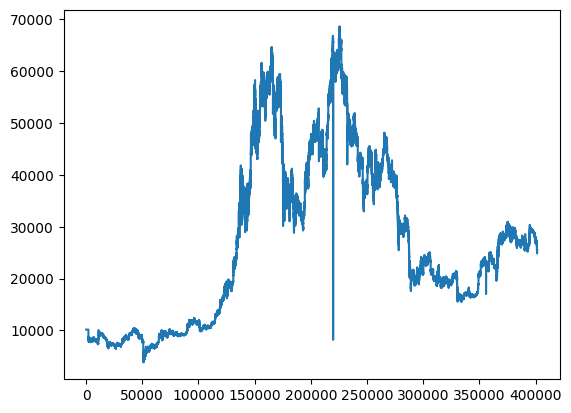

In [22]:
plt.plot(closePrices.to_list())

In [4]:
# Calculate price changes
price_changes = np.diff(closePrices)

print(price_changes)

[ 0.00e+00  0.00e+00  0.00e+00 ...  2.00e-02 -1.02e+00 -1.00e+02]


In [37]:
# Define bins
bins = range(5000,80000,30)
labels = range(5000,80000,30)

# Discretize the price changes into states
states = np.digitize(price_changes, bins, right=True) - 1

In [39]:
# Number of states
num_states = len(labels)

# Initialize transition matrix
transition_matrix = np.zeros((num_states, num_states))

In [40]:
# Count the transitions
for i in range(len(states) - 1):
    current_state = int(states[i])
    next_state = int(states[i + 1])
    transition_matrix[current_state, next_state] += 1

# Normalize the rows to get probabilities
transition_probabilities = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

print("Price Changes:", price_changes)
print("States:", states)
print("Transition Matrix (Counts):\n", transition_matrix)
print("Transition Probabilities:\n", transition_probabilities)

Price Changes: [ 0.00e+00  0.00e+00  0.00e+00 ...  2.00e-02 -1.02e+00 -1.00e+02]
States: [-1 -1 -1 ... -1 -1 -1]
Transition Matrix (Counts):
 [[     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0. 401376.]]
Transition Probabilities:
 [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [0.         0.         0.         ... 0.         0.         0.99999502]]


/var/folders/5d/dfntkb455f3d1crcyglv5ylc0000gn/T/ipykernel_57019/3737278375.py:8: RuntimeWarning: invalid value encountered in divide
  transition_probabilities = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)


In [41]:
transition_probabilities_df = pd.DataFrame(transition_probabilities)

In [42]:
transition_probabilities_df

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is not useful